## Linear regression workbook

This workbook will walk you through a linear regression example. It will provide familiarity with Jupyter Notebook and Python.  Please print (to pdf) a completed version of this workbook for submission with HW #1.

ECE 239AS, Winter Quarter 2019, Prof. J.C. Kao, TAs M. Kleinman and A. Wickstrom and K. Liang and W. Chuang

In [109]:
import numpy as np 
import matplotlib.pyplot as plt

#allows matlab plots to be generated in line
%matplotlib inline 

### Data generation

For any example, we first have to generate some appropriate data to use. The following cell generates data according to the model: $y = x - 2x^2 + x^3 + \epsilon$

Text(0,0.5,'$y$')

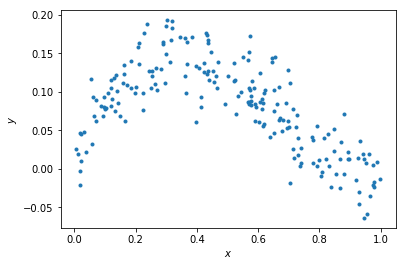

In [121]:
np.random.seed(0)  # Sets the random seed.
num_train = 200     # Number of training data points

# Generate the training data
x = np.random.uniform(low=0, high=1, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

### QUESTIONS:

Write your answers in the markdown cell below this one:

(1) What is the generating distribution of $x$?

(2) What is the distribution of the additive noise $\epsilon$?

### ANSWERS:

(1) uniform distribution between 0 and 1

(2) normal distribution with mean=0 and std=0.03

### Fitting data to the model (5 points)

Here, we'll do linear regression to fit the parameters of a model $y = ax + b$.

In [122]:
# xhat = (x, 1)
xhat = np.vstack((x, np.ones_like(x)))

# ==================== #
# START YOUR CODE HERE #
# ==================== #
# GOAL: create a variable theta; theta is a numpy array whose elements are [a, b]

#least square

#define X,Y that are used in least square method
X = xhat.T
Y = y.T
theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
print("theta for linear regression is ",theta)


# ================== #
# END YOUR CODE HERE #
# ================== #

theta for linear regression is  [-0.10599633  0.13315817]


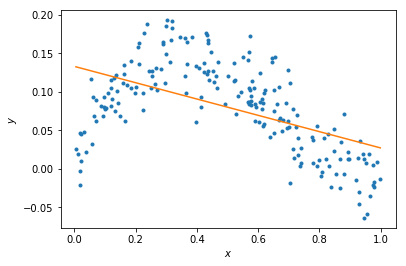

In [123]:
# Plot the data and your model fit.
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression line
xs = np.linspace(min(x), max(x),50)
xs = np.vstack((xs, np.ones_like(xs)))
plt.plot(xs[0,:], theta.dot(xs))

### QUESTIONS

(1) Does the linear model under- or overfit the data?

(2) How to change the model to improve the fitting?

### ANSWERS

(1) Underfit

(2) use a more complex model, use a polynomial regression model with n>1 instead of a linear model

### Fitting data to the model (10 points)

Here, we'll now do regression to polynomial models of orders 1 to 5.  Note, the order 1 model is the linear model you prior fit.

In [124]:

N = 5
xhats = []
thetas = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable thetas.
# thetas is a list, where theta[i] are the model parameters for the polynomial fit of order i+1.
#   i.e., thetas[0] is equivalent to theta above.
#   i.e., thetas[1] should be a length 3 np.array with the coefficients of the x^2, x, and 1 respectively.
#   ... etc.

# xhats = [x^m x^(m-1) ... x^2 x 1]
xhats = np.vstack((x,np.ones_like(x)))
for i in range(N):
    if i==0: # when i=0, xhats don't change
        pass
    else:   # when i>0, need to add one row 
        xhats = np.vstack((x**(i+1),xhats))
        #print(xhats)
    X = xhats.T
    Y = y.T  
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
    thetas.append(theta)
#print(thetas)
print(X.shape)
    
pass

# ================== #
# END YOUR CODE HERE #
# ================== #

(200, 6)


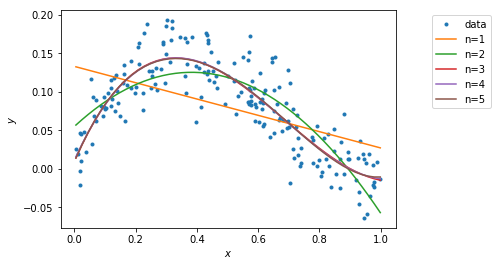

In [125]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

### Calculating the training error (10 points)

Here, we'll now calculate the training error of polynomial models of orders 1 to 5.

In [126]:
training_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable training_errors, a list of 5 elements,
# where training_errors[i] are the training loss for the polynomial fit of order i+1.

#print(X[:,4:6].shape)
for i in range(5):
    err = np.sum(np.square(Y - np.dot(X[:,(4-i):6],thetas[i])))
    training_errors.append(err)
print("training errors for polynomial regression are:\n ",training_errors)  
best_N_loc = np.argmin(training_errors)
N_list = range(5)
best_N = N_list[best_N_loc]+1
print("\nthe best N for polynomial regression is ",best_N)

# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Training errors are: \n', training_errors)


training errors for polynomial regression are:
  [0.4759922176725402, 0.2184984441853706, 0.16339207602210742, 0.16330707470593958, 0.1632295839105059]

the best N for polynomial regression is  5
Training errors are: 
 [0.4759922176725402, 0.2184984441853706, 0.16339207602210742, 0.16330707470593958, 0.1632295839105059]


### QUESTIONS

(1) What polynomial has the best training error?

(2) Why is this expected?

### ANSWERS

(1) 5

(2) Because n=5 overfits the training data since it's the most complex it can capture the noise

### Generating new samples and testing error (5 points)

Here, we'll now generate new samples and calculate testing error of polynomial models of orders 1 to 5.

Text(0,0.5,'$y$')

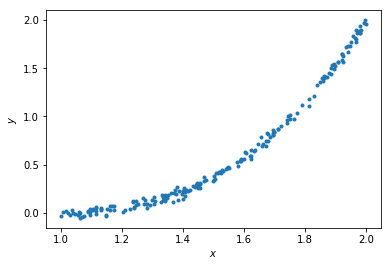

In [127]:
x = np.random.uniform(low=1, high=2, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [128]:
xhats = []
for i in np.arange(N):
    if i == 0:
        xhat = np.vstack((x, np.ones_like(x)))
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        xhat = np.vstack((x**(i+1), xhat))
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))
                              
    xhats.append(xhat)


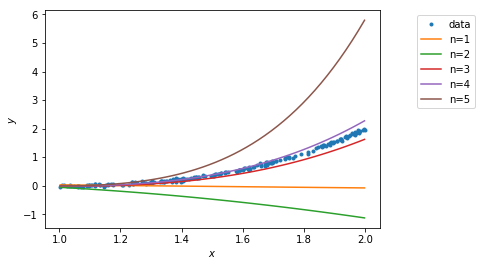

In [129]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

In [130]:
testing_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable testing_errors, a list of 5 elements,
# where testing_errors[i] are the testing loss for the polynomial fit of order i+1.
for i in range(5):
    testing_err = np.sum(np.square(y.T - np.dot(xhats[i].T,thetas[i])))
    testing_errors.append(testing_err)


# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Testing errors are: \n', testing_errors)

Testing errors are: 
 [161.72330369101172, 426.38384890115907, 6.25139421682068, 2.374153041858252, 429.8204358482615]


### QUESTIONS

(1) What polynomial has the best testing error?

(2) Why polynomial models of orders 5 does not generalize well?

### ANSWERS

(1) 4. 

(2) Because it overfits the training data and it is too specific for x in [0,1] so that it cannot predict unseen datas well.